Представьте, что вы специалист по данным, а ваша компания сотрудничает с медицинскими учреждениями. Перед вами стоит задача выяснить, почему люди, получившие инструкции по лечению, не приходят на следующий приём. В качестве набора данных вы используете информацию о посещениях и характеристики пациентов. 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind, shapiro, f_oneway, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

In [11]:
# Первым этапом данных является загрузка данных:
df = pd.read_csv('Data/KaggleV2-May-2016.csv')

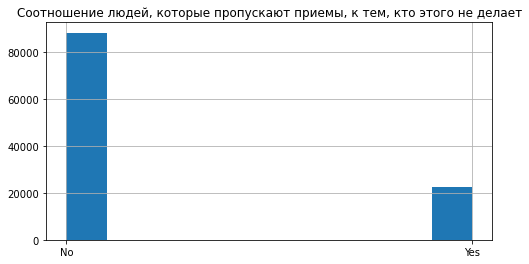

In [12]:
# Найти соотношение людей, которые пропускают приёмы, к тем, кто этого не делает, можно с помощью гистограммы:
plt.figure(figsize=(8,4))
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускают приемы, к тем, кто этого не делает');

In [13]:
# получим точную пропорцию, — с помощью метода value_counts():
df['No-show'].value_counts(True)

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

In [14]:
# Данный метод также может помочь оценить, кто не появляется чаще — мужчины или женщины:
df[df['No-show']=='Yes']['Gender'].value_counts(True)

F    0.653882
M    0.346118
Name: Gender, dtype: float64

In [15]:
# После того, как выполнен разведывательный анализ данных, переходим к предобработке данных. 
# Некоторые столбцы, например ‘Gender’ и ‘Neighbourhood’, представлены в текстовом виде, 
# а модели машинного обучения работают с числовыми признаками. Необходимо закодировать такие данные. 
# Для one-hot кодировки можно воспользоваться методом get_dummies() библиотеки pandas:

categorical_columns_names = ['Gender', 'Neighbourhood']
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

Далее - в отдельном ноутбуке

### Логгирование

In [16]:
# Уровни логгирования

import logging
logging.debug('Это сообщение отладки')
logging.info('Это информационное сообщение')
logging.warning('Это сообщение-предупреждение')
logging.error('Это сообщение об ошибке')
logging.critical('Это критическое сообщение')

ERROR:root:Это сообщение об ошибке
CRITICAL:root:Это критическое сообщение


сообщения debug() и info() не были отображены. Это связано с тем, что по умолчанию модуль ведения журнала регистрирует сообщения только с уровнем ПРЕДУПРЕЖДЕНИЕ (WARNING) или выше. Вы можете изменить это, сконфигурировав модуль logging для регистрации событий всех уровней, то есть установив уровень на ОТЛАДКУ (DEBUG). 

In [17]:
# настроим уровень ведения журнала на DEBUG.

logging.basicConfig(level=logging.DEBUG)
logging.debug('Сообщение будет залогировано!')

In [18]:
# установка обработчика логгирования
logging.FileHandler('log_file.log')

<FileHandler /Users/a.y.macbookair/Desktop/Python/python_classes/Module 28 - EDA-6/log_file.log (NOTSET)>

In [19]:
# настроим формат записей журнала.

logging.basicConfig(format="%(levelname)s: %(asctime)s: %(message)s", level=logging.DEBUG)
logging.info('Проверка')

In [20]:
# Создадим функцию log() для генерации лог-файла и записи в него информации.

# Функция для создания лог-файла и записи в него информации
def get_logger(path, file):
  """[Создает лог-файл для логирования в него]
  Аргументы:
      path {string} -- путь к директории
      file {string} -- имя файла
   Возвращает:
      [obj] -- [логер]
  """
  # проверяем, существует ли файл
  log_file = os.path.join(path, file)
 
  #если  файла нет, создаем его
  if not os.path.isfile(log_file):
      open(log_file, "w+").close()
  
  # поменяем формат логирования
  file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"
  
  # конфигурируем лог-файл
  logging.basicConfig(level=logging.INFO, 
  format = file_logging_format)
  logger = logging.getLogger()
  
  # создадим хэнлдер для записи лога в файл
  handler = logging.FileHandler(log_file)
  
  # установим уровень логирования
  handler.setLevel(logging.INFO)
  
  # создадим формат логирования, используя file_logging_format
  formatter = logging.Formatter(file_logging_format)
  handler.setFormatter(formatter)
  
  # добавим хэндлер лог-файлу
  logger.addHandler(handler)
  return logger

get_logger принимает на вход папку, в которой вы хотите хранить файл лога и имя файла. Функция нацелена на создание информационных сообщений и записи их в лог-файл.

In [21]:
# Для удобства лог-файлы хранят в отдельной директории. Новую папку можно создать с помощью команды mkdir:

!mkdir logs

mkdir: logs: File exists


In [22]:
# Создадим лог-файл и запишем туда информацию о датасете.

# создаем лог-файл
logger = get_logger(path="logs/", file="data.logs")
logger.info("Data")
logger.info("Data shape {}".format(df.shape))
logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))
logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))

In [23]:
# Например, мы можем проверять форму данных, и, если форма не соответствует необходимой, логировать ошибку:

if df.shape != (110526,14):
 logger.error('Data shape is incorrect!')

ERROR:root:Data shape is incorrect!


подробности в отдельном ноутбуке

### Comet.ml - логгирование

In [26]:
pip install comet_ml

     |████████████████████████████████| 361 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 145 kB 6.9 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 4.0 MB/s  eta 0:00:01
     |████████████████████████████████| 54 kB 2.2 MB/s  eta 0:00:01
     |████████████████████████████████| 485 kB 9.0 MB/s eta 0:00:01
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19191 sha256=9880ba7efd6fee19b8a0943139b848fe2252d4568cbc364793925358849a8595
  Stored in directory: /Users/a.y.macbookair/Library/Caches/pip/wheels/f6/d8/b0/15cfd7805d39250ac29318105f09b1750683387630d68423e1
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34546 sha256=1c649733fd41f3dc92e07e7ba02db06f4731a95a161577da7b3149540d5aeacd
  Stored in directory: /Users/a.y.macbookair/Library/Caches/pip/wheels/4b/35/53/dfa4d3a4196794cb0a777a97c68dcf02b073d33de9c135d72a
Successfully built nvidia-ml-py3 configobj
Note: you may need to restart the

In [27]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="89c6b0UBeQxZDPkwrZ3yQjviG",
    project_name="medical-appointment",
    workspace="emissary",)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/emissary/medical-appointment/f1d86da47f0f4ba6b682417bc8802db5



популярные методы:

    log_metric() и log_metrics() — логируют в эксперименте одну или несколько оценочных метрик, таких как accuracy;
    log_figure() — логирует рисунок;
    display() — создаёт интерактивную среду в Jupyter, показывающую приборную панель Comet как вывод ячейки;
    end() — если эксперимент выполняется в Jupyter, этот метод указывает, что эксперимент завершён.


далее в отдельном ноутбуке